In [1]:
# Import libraries
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load energy calculations I saved from other scrips and notebooks.
dt = 600 #s

# barotropic APE (ssh contribution to PE)
EP_baro = np.load('../PE_barotropic.npz')
EP_febTS = np.load('../PE_febTS.npz')

# APE (using density anomaly)
APE_febTS = np.load('../APE_febTS.npz')

# KE
KE_baro = np.load('../KE_barotropic.npz')
KE_febTS = np.load('../KE_febTS.npz')

# I got these from wind_and_kinetic_energy.ipynb
Ewind_SVB =        np.array([1967.336140,
                             13658.249842,
                             58381.587749,
                             203059.249746,
                             583040.490311,
                            1605971.282449,
                            4212949.908733,
                            9988163.429514,
                            22737647.608706,
                            49719098.402076,
                            100951667.449054,
                            195337257.246875,
                            361892444.111385,
                            631783365.147192,
                            1047506643.644784,
                            1656420482.996358,
                            2488822890.624424,
                            3552559954.569267,
                            4826334444.561691,
                            6249001678.690140,
                            7481331481.931970,
                            0.000000])

Ewind_noSVB =          np.array([1908.242113,
                                13250.440428,
                                56643.048604,
                                197022.699529,
                                565736.516323,
                                1558333.593194,
                                4088052.794804,
                                9692372.395526,
                                22064613.394391,
                                48247946.294462,
                                97966799.420028,
                                189564709.144951,
                                351202565.610907,
                                613133365.634483,
                                1016604312.240177,
                                1607583381.294032,
                                2415491252.341014,
                                3447959452.724622,
                                4684328563.799050,
                                6065263172.112794,
                                7261647121.061090,
                                0.000000])

Ewind_onlySVB =       np.array([57.999554,
                                399.526290,
                                1701.314444,
                                5902.245192,
                                16903.844723,
                                46522.982646,
                                121952.956161,
                                288711.758155,
                                656842.711860,
                                1435618.962636,
                                2912042.260602,
                                5630858.473472,
                                10426294.092496,
                                18186848.292017,
                                30130501.571881,
                                47611648.716257,
                                71482254.507949,
                                101949005.517322,
                                138389008.463340,
                                179037874.016783,
                                213991926.116055,
                                0.000000
                                ])

In [3]:
# integrate the wind power input over the whole time it is applied (total energy input into the system)
tot_wind_energy_SVB = np.sum(Ewind_SVB*dt)
tot_wind_energy_noSVB = np.sum(Ewind_noSVB*dt)
tot_wind_energy_onlySVB = np.sum(Ewind_onlySVB*dt)

# load PEs calculated in the scrips energy_calc_barotropic.py and
# energy_calcs_baroclinic.py (I called it EP because Spanish...)

EP_SVB_baro = EP_baro['EpSVB'][:]
EP_noSVB_baro = EP_baro['EpnoSVB'][:]
EP_onlySVB_baro = EP_baro['Ep'][:]
EP_maskSVB_baro = EP_baro['Epsvbmask'][:]

EP_SVB = EP_febTS['EpSVB'][:]
EP_noSVB = EP_febTS['EpnoSVB'][:]
EP_onlySVB = EP_febTS['Ep'][:]
EP_maskSVB = EP_febTS['Epsvbmask'][:]

# Loading pre-calculated energies
KE_SVB_baro = KE_baro['KSVB'][:]
KE_noSVB_baro = KE_baro['KnoSVB'][:]
KE_onlySVB_baro = KE_baro['K'][:]
KE_maskSVB_baro = KE_baro['K_svbmask'][:]

KE_SVB = KE_febTS['KSVB'][:]
KE_noSVB = KE_febTS['KnoSVB'][:]
KE_onlySVB = KE_febTS['K'][:]
KE_maskSVB = KE_febTS['K_svbmask'][:]

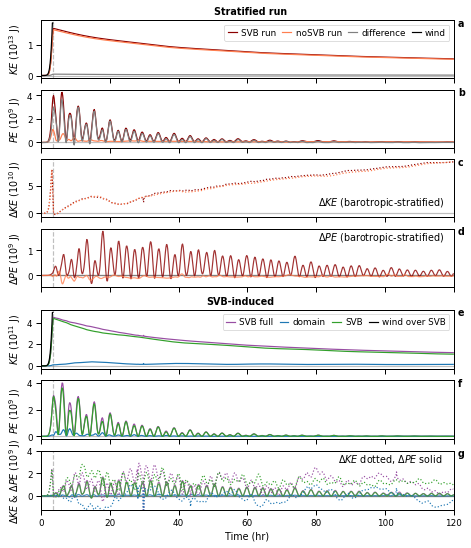

In [69]:
sns.set_context('paper')

fig = plt.figure(figsize=(7.4,9))
gs0 = gridspec.GridSpec(2, 1, figure=fig, height_ratios=(1,0.75), hspace=0.1)
gs00 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[0])
gs01 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1])

ax1 = fig.add_subplot(gs00[0])
ax2 = fig.add_subplot(gs00[1])
ax3 = fig.add_subplot(gs00[2])
ax4 = fig.add_subplot(gs00[3])
ax5 = fig.add_subplot(gs01[0])
ax6 = fig.add_subplot(gs01[1])
ax7 = fig.add_subplot(gs01[2])


for ax,lab in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7),('a','b','c','d','e','f','g')):
    ax.axvline(3.5,color='0.5', linestyle='--', alpha=0.5)
    ax.axhline(0, color='0.5', alpha=0.5)
    ax.text(1.01,0.9,lab, fontweight='bold',transform=ax.transAxes)

for ax in (ax1,ax2,ax3,ax4,ax5,ax6):
    ax.set_xticklabels([])
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_SVB*1E-13, color='darkred', label='SVB run')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_noSVB*1E-13, color='coral',label='noSVB run')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_SVB-KE_noSVB)*1E-13, color='0.5',label='difference')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_SVB*dt)*1E-13, 'k-',label='wind')
ax1.set_ylabel('$KE$ ($10^{13}$ J)')
ax1.set_xlim(0,120)
ax1.text(0.42,1.1,'Stratified run', fontweight='bold',transform=ax1.transAxes)

ax2.plot((np.arange(len(EP_SVB))*600)/3600,EP_SVB*1E-9,color='darkred', label='SVB run')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_noSVB*1E-9, color='coral', label='noSVB run')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_SVB-EP_noSVB)*1E-9, color='0.5', label='difference')
ax2.set_ylabel('$PE$ ($10^{9}$ J)')
#ax2.set_ylim(0,4.5)
ax2.set_xlim(0,120)

ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_SVB_baro-KE_SVB)*1E-10,':', 
         color='darkred', label='SVB run', alpha=1)
ax3.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_noSVB_baro-KE_noSVB)*1E-10, ':',
         color='coral', label='noSVB run ' , alpha=1)
ax3.set_ylabel('$\Delta KE$ ($10^{10}$ J)')
ax3.set_xlim(0,120)

ax4.axhline(0,color='0.5')
ax4.plot((np.arange(len(EP_SVB))*600)/3600,(EP_SVB_baro-EP_SVB)*1E-9,
         color='darkred', 
         label='SVB run', alpha=0.8)
ax4.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_noSVB_baro-EP_noSVB)*1E-9,
         color='coral', 
         label='noSVB run', alpha=0.8)
ax4.set_ylabel('$\Delta PE$ ($10^{9}$ J)')
ax4.set_xlim(0,120)
ax3.text(0.67,0.2,'$\Delta KE$ (barotropic-stratified)', transform=ax3.transAxes )
ax4.text(0.67,0.8,'$\Delta PE$ (barotropic-stratified)', transform=ax4.transAxes)

ax5.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB*1E-11, color='#984ea3', label='SVB full')
ax5.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB*1E-11, color='#1f78b4',label='domain')
ax5.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB-KE_onlySVB)*1E-11,color='#33a02c', label='SVB')
ax5.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt)*1E-11, 'k-',label='wind over SVB')
ax5.set_ylabel('$KE$ ($10^{11}$ J)')
#ax5.set_ylim(0,5E11)
ax5.set_xlim(0,120)
ax5.text(0.4,1.1,'SVB-induced', fontweight='bold',transform=ax5.transAxes)

ax6.plot((np.arange(len(EP_SVB))*600)/3600,EP_maskSVB*1E-9,color='#984ea3', label='SVB full')
ax6.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB*1E-9, color='#1f78b4', label='domain')
ax6.plot((np.arange(len(EP_maskSVB))*600)/3600,(EP_maskSVB-EP_onlySVB)*1E-9,color='#33a02c', label='SVB')
ax6.set_ylabel('$PE$ ($10^{9}$ J)')
#ax6.set_ylim(0,4.2E9)
ax6.set_xlim(0,120)

ax7.axhline(0,color='0.5')
ax7.plot((np.arange(len(EP_SVB))*600)/3600,(EP_maskSVB_baro-EP_maskSVB)*1E-9,
         color='#984ea3', 
         label=' $\Delta PE$ SVB full', alpha=0.8)
ax7.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB_baro-EP_onlySVB)*1E-9,
         color='#1f78b4', 
         label='$\Delta PE$ domain', alpha=0.8)
ax7.plot((np.arange(len(EP_maskSVB))*600)/3600,((EP_maskSVB_baro-EP_onlySVB_baro)-(EP_maskSVB-EP_onlySVB))*1E-9,
         color='#33a02c', label='$\Delta PE$ SVB', alpha=0.8)#
#ax7.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB_baro-KE_noSVB_baro)-(KE_SVB-KE_noSVB),':',color='orange',
#         label='KE SVB-noSVB domain')
ax7.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro-KE_maskSVB)*1E-9,':', 
         color='#984ea3', label='$\Delta KE$ SVB full', alpha=1)
ax7.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB_baro-KE_onlySVB)*1E-9, ':',
         color='#1f78b4', label=r'$\Delta KE$ domain ' , alpha=1)
ax7.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro-KE_onlySVB_baro-(KE_maskSVB-KE_onlySVB))*1E-9,
         ':',color='#33a02c', label='$\Delta KE$ SVB ', alpha=1)

ax7.set_ylabel(r'$\Delta KE$ & $\Delta PE$ ($10^{9}$ J)')
ax7.set_xlabel('Time (hr)')
ax7.set_xlim(0,120)
ax7.set_ylim(-1.2,4)

ax7.text(0.72,0.8,'$\Delta KE$ dotted, $\Delta PE$ solid', transform=ax7.transAxes )

ax1.legend(ncol=4, labelspacing=0.5, columnspacing=0.7, handlelength=1, handletextpad=0.5)
ax5.legend(ncol=4, labelspacing=0.5, columnspacing=0.7, handlelength=1, handletextpad=0.5)



plt.savefig('figure_energy.png', dpi=500, bbox_inches='tight', borderpad=0)